In [1]:
# Import packages
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
neighbourhoods = gpd.read_file("../shapefiles/ONS/ons.shp")
neighbourhoods.head()

FID  flag  ONS_ID                                  Name  POPEST  \
0    1     0     938                    Old Barrhaven West   16880   
1    2     1       3  Beacon Hill South - Cardinal Heights    7195   
2    3     0     902                           Beaverbrook    6715   
3    4     1       6                    Bells Corners East    4729   
4    5     1       7                    Bells Corners West    4158   

                              Name_FR    Shape__Are    Shape__Len  \
0                 Old Barrhaven Ouest  1.030476e+07  15745.394276   
1  Beacon Hill Sud - Cardinal Heights  4.533907e+06  10362.452308   
2                                None  5.744251e+06  10135.952452   
3                   Bells Corners Est  6.786858e+06  11170.923795   
4                 Bells Corners Ouest  2.772272e+06   7467.061209   

                                            geometry  
0  POLYGON ((-75.77100 45.26216, -75.77364 45.260...  
1  POLYGON ((-75.58543 45.44887, -75.58545 45.448...  
2  POLYGON ((-75.90837 45.33448, -75.90828 45.334...  
3  POLYGON ((-75.80921 45.33091, -75.80895 45.330...  
4  POLYGON ((-75.82832 45.31327, -75.82823 45.313...

In [3]:
# Filter data
gdf = neighbourhoods[['geometry', 'POPEST', 'Name']]

<AxesSubplot:>

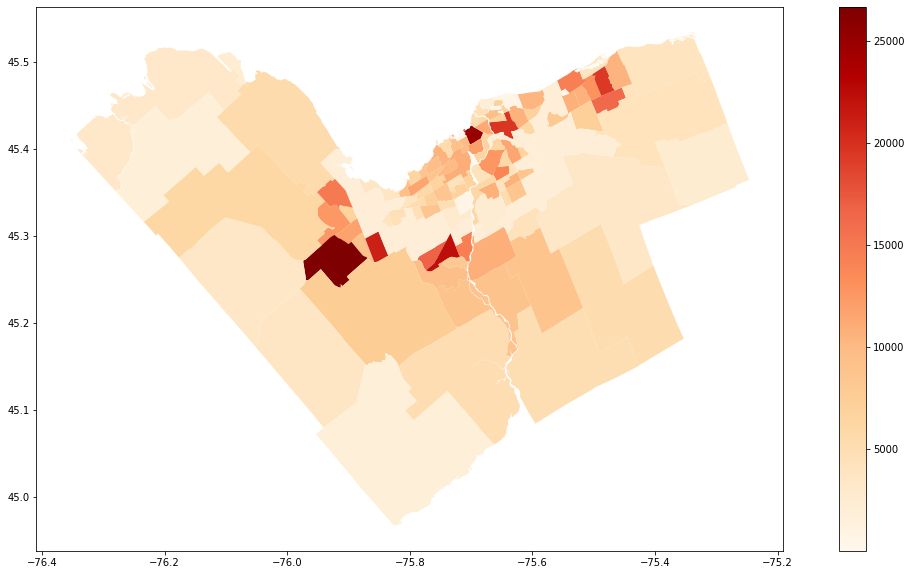

In [4]:
# Plot filtered data by population density 
gdf.plot(column = 'POPEST',
         cmap = 'OrRd', 
         figsize=(20,10),
         legend = True)

In [5]:
# Classification algortihm, do quartile
quart = np.percentile(gdf.POPEST, [25, 50, 75])

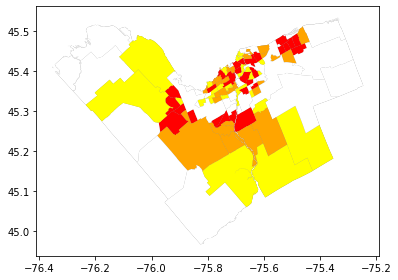

In [6]:
c = {'Q1': 'white',
     'Q2': 'yellow',
     'Q3': 'orange',
     'Q4': 'red'}


fig, ax = plt.subplots()
# For background
neighbourhoods.plot(ax=ax, facecolor='gray');

# Plot the population density accordingly 
for index, row in gdf.iterrows():
    data = gdf.iloc[index]
    to_plot = gdf[gdf.Name == data.Name]
    if(data.POPEST <= quart[0]):
        to_plot.geometry.plot(ax=ax, facecolor=c['Q1'])
    elif(data.POPEST <= quart[1]):
        to_plot.plot(ax=ax, facecolor=c['Q2'])
    elif(data.POPEST <= quart[2]):
        to_plot.plot(ax=ax, facecolor=c['Q3'])
    else:
        to_plot.plot(ax=ax, facecolor=c['Q4'])
        
plt.tight_layout();